In [2]:
%matplotlib inline  
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
def draw(x):
    plt.imshow(x)
    plt.colorbar()
    plt.show()

In [1]:
import numpy as np
import cahnHillSolver as ch
import mks_localisation

In [9]:
import pymks

In [19]:
np.random.seed(10)
X = (np.random.random((5,5))>0.5).astype(int)
print(X)
print('\n')
X_ = primitive_basis(X, domain=(0,1), n_states=2)
print(X_[:,:,0])
print("\n")
print(X_prim[:,:,0])
print('\n')
print(X_[:,:,1])
print("\n")
prim_basis = pymks.PrimitiveBasis(n_states=3)
X_prim = prim_basis.discretize(X)
print(X_prim[:,:,1])

[[1 0 1 1 0]
 [0 0 1 0 0]
 [1 1 0 1 1]
 [1 1 0 1 1]
 [1 0 0 1 0]]


[[ 0.  1.  0.  0.  1.]
 [ 1.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  1.  1.  0.  1.]]


[[ 0.  1.  0.  0.  1.]
 [ 1.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  1.  1.  0.  1.]]


[[ 1.  0.  1.  1.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 1.  1.  0.  1.  1.]
 [ 1.  1.  0.  1.  1.]
 [ 1.  0.  0.  1.  0.]]


[[ 1.  0.  1.  1.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 1.  1.  0.  1.  1.]
 [ 1.  1.  0.  1.  1.]
 [ 1.  0.  0.  1.  0.]]


In [26]:
import pymks

In [27]:
import primitive

In [49]:
x_data = np.array([[[1, 1, 0],
                    [1, 0 ,2],
                    [0, 1, 0]]])
assert(x_data.shape == (1, 3, 3))
x_test = np.array([[[[0, 1, 0],
                     [0, 1, 0],
                     [1, 0, 0]],                   
                    [[0, 1, 0],
                     [1, 0, 0],
                     [0, 0, 1]],
                    [[1, 0, 0],
                     [0, 1, 0],
                     [1, 0, 0]]]])
x_prim = primitive.primitive_basis(x_data, domain=(0,2), n_states=3)

prim_basis = pymks.PrimitiveBasis(n_states=3)

assert(np.allclose(x_test, prim_basis.discretize(x_data)))
assert(np.allclose(x_test, x_prim))

prim_basis = pymks.PrimitiveBasis(n_states=2)
X = np.array([1, 1, 0])
X_test = np.array([[0, 1, 0],
                   [0, 1, 0],
                   [1, 0, 0]])
# assert(np.allclose(X_test, prim_basis.discretize(X)))
print("pymks")
print(prim_basis.discretize(X))
print("mine")
print(primitive.primitive_basis(X, domain=(0,1),n_states=2))

pymks
[[ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]]
mine
[[ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]]


In [22]:
%%time
X_train, y_train = ch.make_dataset(seed=99, tsteps=10, shape=(200,51,51), dx=0.1, dt=1e-2, gamma=1.)
X_test, y_test   = ch.make_dataset(seed=81, tsteps=10, shape=(10,51,51), dx=0.1, dt=1e-2, gamma=1.)

CPU times: user 1.5 s, sys: 40 ms, total: 1.54 s
Wall time: 1.54 s


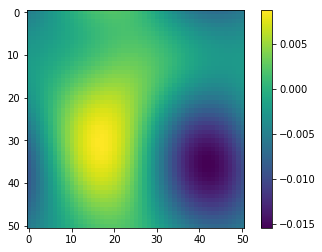

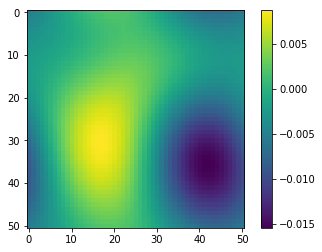

CPU times: user 3.94 s, sys: 424 ms, total: 4.36 s
Wall time: 2.98 s


In [24]:
%%time
n_states_ = 10
domain_   = (-1, 1)
disc      = legendre.legendre_basis
# disc      = primitive.primitive_basis
coeff_    = mks_localisation.fit(X=X_train, y=y_train, domain=domain_, n_states=n_states_, discretize=disc)
y_predict = mks_localisation.predict(X=X_test, coeff=coeff_, domain=domain_, n_states=n_states_, discretize=disc)
draw(y_test[3])
draw(y_predict[3])